# SD204_lab2, Teboul Raphaël

In [1]:
fn1 = "raphael"
ln1 = "teboul"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD204_lab1", ln1, fn1])) + ".ipynb"

In [1]:
# A few tactical imports

import sys
import pylab
import math
from os import path
import pandas as pd
import numpy as np
import scipy as sp
import time
from numpy import random 
from numpy import linalg
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
pylab.rcParams['figure.figsize'] = (15, 10)

### Exercice 1

#### a)

In [3]:
n,p = 100,2000
mu,sigma = 0,5**0.5
l = 10**-5
X = np.random.normal(mu,sigma,(n,p))
y = np.random.rand(n,1)
In = np.identity(n)
Ip = np.identity(p)
An = np.dot(X,X.T) + l*In
Ap = np.dot(X.T,X) + l*Ip

xTilde1 = np.linalg.solve(An,y)
xTilde2 = np.linalg.solve(Ap,X.T)
a1 = np.dot(X.T,xTilde1)
a2 = np.dot(xTilde2,y)

print(np.allclose(a1,a2,atol = 10**-4))

True


2)

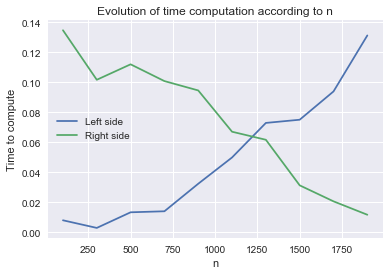

In [3]:
n, p = 100, 2000
mu,sigma = 0,5**0.5
l = 10**-5
timeLeft = []
timeRight = []
equal = []
nList = [] 
while (n < 2001 and p > 99):
    nList.append(n)
    X = np.random.normal(mu,sigma,(n,p))
    y = np.random.rand(n,1)
    
    start1 = time.time()
    In = np.identity(n)
    An = np.dot(X,X.T) + l*In
    xTilde1 = np.linalg.solve(An,y)
    a1 = np.dot(X.T,xTilde1)
    end1 = time.time()
    
    start2 = time.time()
    Ip = np.identity(p)
    Ap = np.dot(X.T,X) + l*Ip
    xTilde2 = np.linalg.solve(Ap,X.T)
    a2 = np.dot(xTilde2,y)
    end2 = time.time()
    
    eq = np.allclose(a1,a2,atol = 10**-4)
    
    timeLeft.append(end1 - start1)
    timeRight.append(end2 - start2)
    equal.append(eq)
    
    n = n + 200
    p = p - 200
 
plt.clf()
plt.plot(nList,timeLeft,label = "Left side")
plt.plot(nList,timeRight,label = "Right side")
plt.xlabel("n")
plt.ylabel("Time to compute")
plt.title("Evolution of time computation according to n")
plt.legend()
plt.show()

### Exercice 2

3) I choosed a uniform distribution. As the mean has to be of zero and the variance of 2, the parameters of the uniform distribution are : $ a=-\sqrt{6} $ and $ b= \sqrt{6} $. 

So let be $X $ ~ $U(a,b)$. 

I also choosed a centered Gamma distribution so, in the same way we get: 

Let $Y = Y' - 2$ , with $ Y'$ ~ $ Gamma(k,\theta) $ with $ k = 2 $ and $ \theta = 1 $

At last I choosed a centered exponential distribution:

Let $Z = Z' - \frac{1}{\lambda}$, with $ Z'$ ~ $ Exp(\lambda) $ with $ \lambda = \frac{1}{\sqrt{2}}$

In [5]:
def random_matrix_Uniform(n,p):
    return np.random.uniform(-math.sqrt(6), math.sqrt(6), size=(n,p))

def random_matrix_c_Gamma(n,p):
    Ybis = np.random.gamma(2,1, size=(n,p))
    return (Ybis - 2)

def random_matrix_c_Exp(n,p):
    Zbis = np.random.exponential(math.sqrt(2), size=(n,p))
    return (Zbis - (math.sqrt(2)))

### 4) First graph for the uniform distribution

In purple one can observe the singular values for p = 200, in red for p = 500, in green for p = 1000 and in blue for p = 2000.

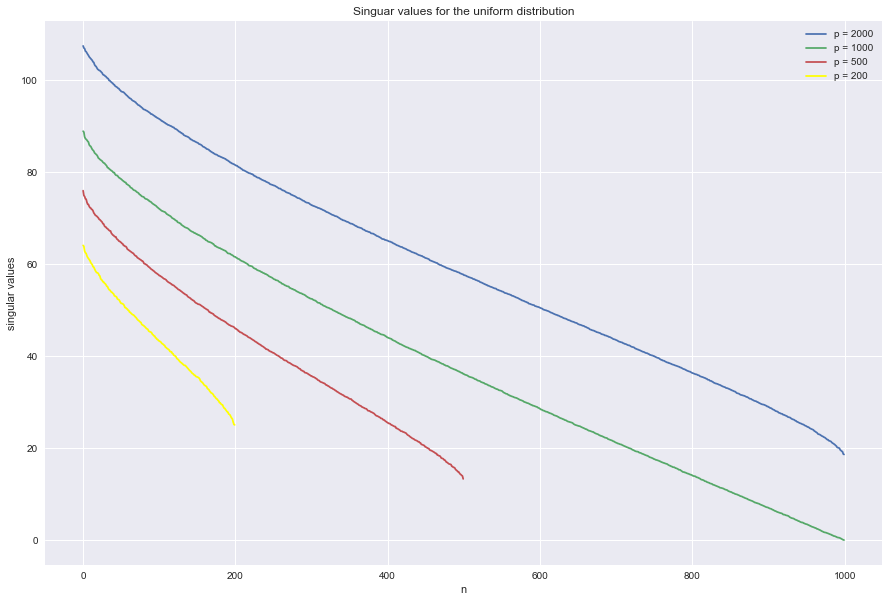

In [6]:
n = 1000

# We generate the matrices
X1 = random_matrix_Uniform(n,200)
X2 = random_matrix_Uniform(n,500)
X3 = random_matrix_Uniform(n,1000)
X4 = random_matrix_Uniform(n,2000)

# We compute their singular values
S1 = np.linalg.svd(X1, compute_uv=0)
S2 = np.linalg.svd(X2, compute_uv=0)
S3 = np.linalg.svd(X3, compute_uv=0)
S4 = sp.linalg.svd(X4, compute_uv=0)

plt.clf()
plt.plot(S4, label = 'p = 2000')
plt.plot(S3, label = 'p = 1000')
plt.plot(S2, label = 'p = 500')
plt.plot(S1, 'yellow', label = 'p = 200')
plt.xlabel("n")
plt.ylabel("singular values")
plt.title("Singuar values for the uniform distribution")
plt.legend()
plt.legend()
plt.show()

### Second graph for the centered gamma distribution

In purple one can observe the singular values for p = 200, in red for p = 500, in green for p = 1000 and in blue for p = 2000.

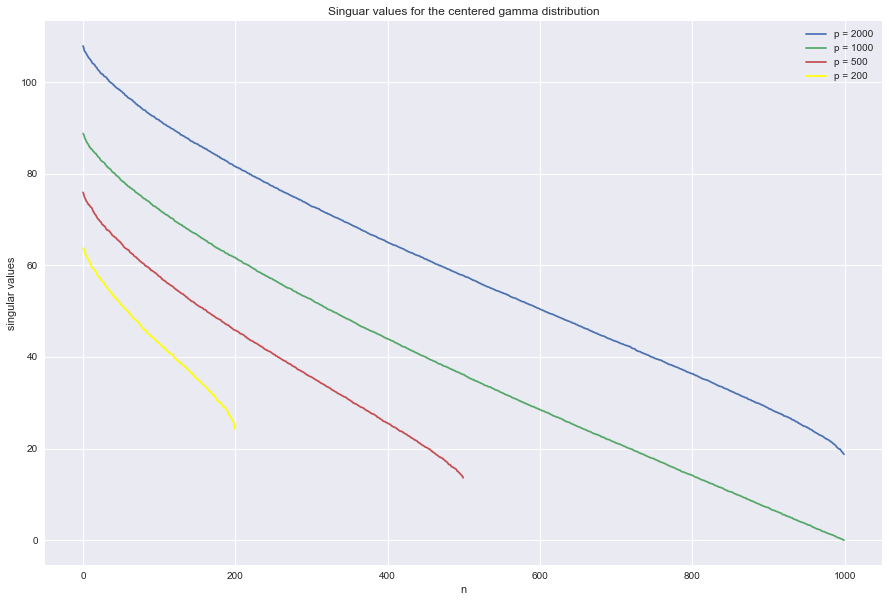

In [7]:
n = 1000

# We generate the matrices
Y1 = random_matrix_c_Gamma(n,200)
Y2 = random_matrix_c_Gamma(n,500)
Y3 = random_matrix_c_Gamma(n,1000)
Y4 = random_matrix_c_Gamma(n,2000)

# We compute their singular values
T1 = np.linalg.svd(Y1, compute_uv=0)
T2 = np.linalg.svd(Y2, compute_uv=0)
T3 = np.linalg.svd(Y3, compute_uv=0)
T4 = np.linalg.svd(Y4, compute_uv=0)

plt.clf()
plt.plot(T4, label ='p = 2000')
plt.plot(T3, label ='p = 1000')
plt.plot(T2, label ='p = 500')
plt.plot(T1,'yellow', label ='p = 200')
plt.xlabel("n")
plt.ylabel("singular values")
plt.title("Singuar values for the centered gamma distribution")
plt.legend()
plt.show()

### Third graph for the centered exponential distribution

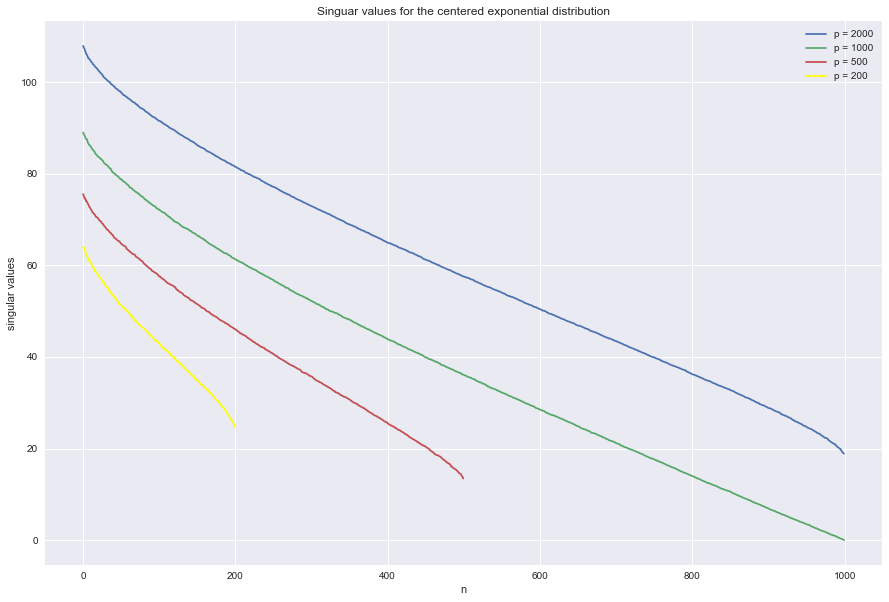

In [8]:
n = 1000

# We generate the matrices
Z1 = random_matrix_c_Exp(n,200)
Z2 = random_matrix_c_Exp(n,500)
Z3 = random_matrix_c_Exp(n,1000)
Z4 = random_matrix_c_Exp(n,2000)

# We compute their singular values
U1 = np.linalg.svd(Z1, compute_uv=0)
U2 = np.linalg.svd(Z2, compute_uv=0)
U3 = np.linalg.svd(Z3, compute_uv=0)
U4 = np.linalg.svd(Z4, compute_uv=0)

plt.clf()
plt.plot(U4, label = 'p = 2000')
plt.plot(U3, label = 'p = 1000')
plt.plot(U2, label = 'p = 500')
plt.plot(U1, 'yellow',label = 'p = 200')
plt.xlabel("n")
plt.ylabel("singular values")
plt.title("Singuar values for the centered exponential distribution")
plt.legend()
plt.show()

Remark : It is always the same result, whatever the distribution we compute.

### 5) 

Let's deal first with the calculus of $\frac{1}{n}X^{T}X$:

In [9]:
# For the uniform distribution
M1 = (1/n)*(np.dot(np.transpose(X1),X1))
M2 = (1/n)*(np.dot(np.transpose(X2),X2))
M3 = (1/n)*(np.dot(np.transpose(X3),X3))
M4 = (1/n)*(np.dot(np.transpose(X4),X4))

# For the centered gamma distribution
N1 = (1/n)*(np.dot(np.transpose(Y1),Y1))
N2 = (1/n)*(np.dot(np.transpose(Y2),Y2))
N3 = (1/n)*(np.dot(np.transpose(Y3),Y3))
N4 = (1/n)*(np.dot(np.transpose(Y4),Y4))

# For the centered exponential distribution
O1 = (1/n)*(np.dot(np.transpose(Z1),Z1))
O2 = (1/n)*(np.dot(np.transpose(Z2),Z2))
O3 = (1/n)*(np.dot(np.transpose(Z3),Z3))
O4 = (1/n)*(np.dot(np.transpose(Z4),Z4))

Let's then compute the spectrum of these matrices :

### First for the uniform distribution

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


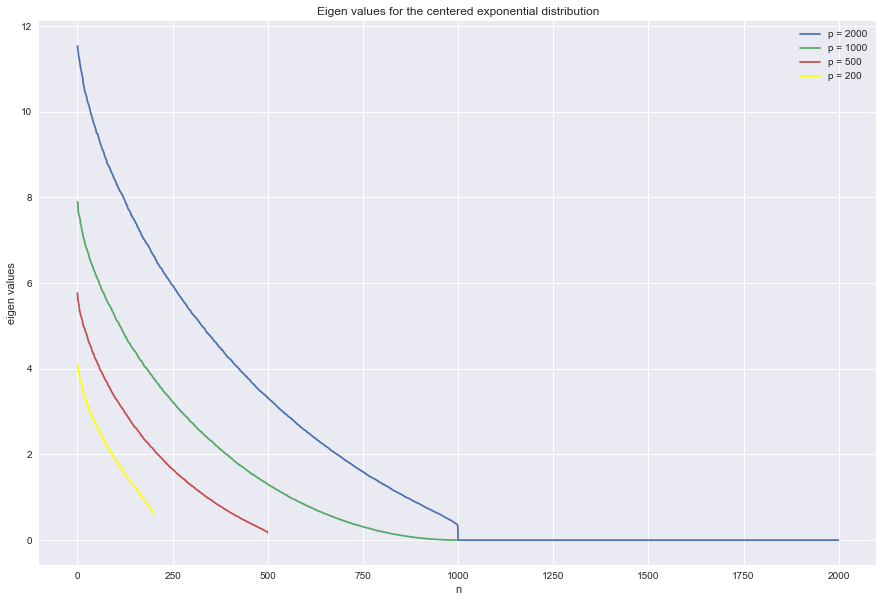

In [10]:
# We compute the sorted spectrum of the matrices
A1 = np.flip(sorted(np.linalg.eigvals(M1)),0)
A2 = np.flip(sorted(np.linalg.eigvals(M2)),0)
A3 = np.flip(sorted(np.linalg.eigvals(M3)),0)
A4 = np.flip(sorted(np.linalg.eigvals(M4)),0)

plt.clf()
plt.plot(A4, label='p = 2000')
plt.plot(A3, label='p = 1000')
plt.plot(A2, label='p = 500')
plt.plot(A1, 'yellow', label='p = 200')
plt.xlabel("n")
plt.ylabel("eigen values")
plt.title("Eigen values for the centered exponential distribution")
plt.legend()
plt.show()

NB : As we get complex eigen values the imaginary part is not shown on the graph

### Second graph for the centered gamma distribution

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


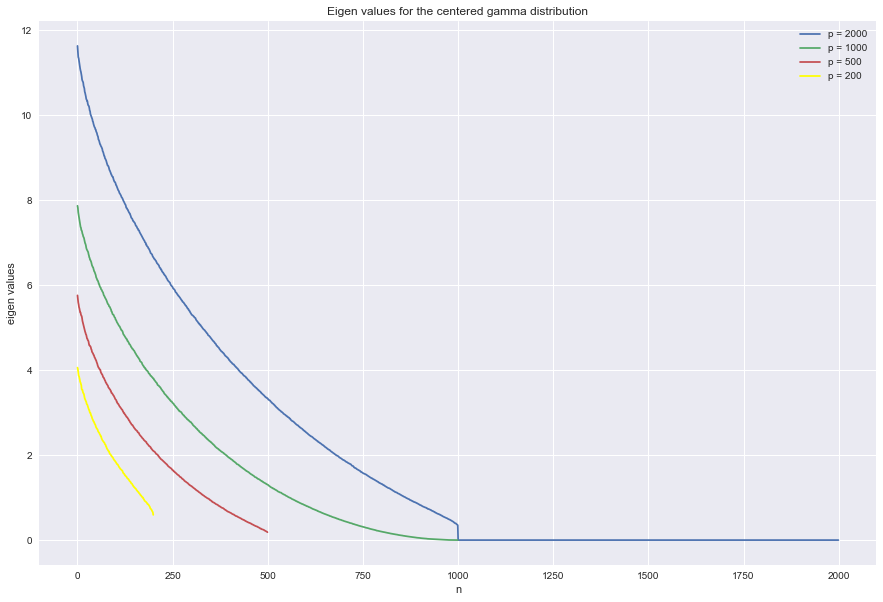

In [11]:
# We compute the sorted spectrum of the matrices
B1 = np.flip(sorted(np.linalg.eigvals(N1)),0)
B2 = np.flip(sorted(np.linalg.eigvals(N2)),0)
B3 = np.flip(sorted(np.linalg.eigvals(N3)),0)
B4 = np.flip(sorted(np.linalg.eigvals(N4)),0)

plt.clf()
plt.plot(B4, label='p = 2000')
plt.plot(B3, label='p = 1000')
plt.plot(B2, label='p = 500')
plt.plot(B1, 'yellow', label='p = 200')
plt.xlabel("n")
plt.ylabel("eigen values")
plt.title("Eigen values for the centered gamma distribution")
plt.legend()
plt.show()

NB : As we get complex eigen values the imaginary part is not shown on the graph

### Third graph for the centered exponential distribution

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


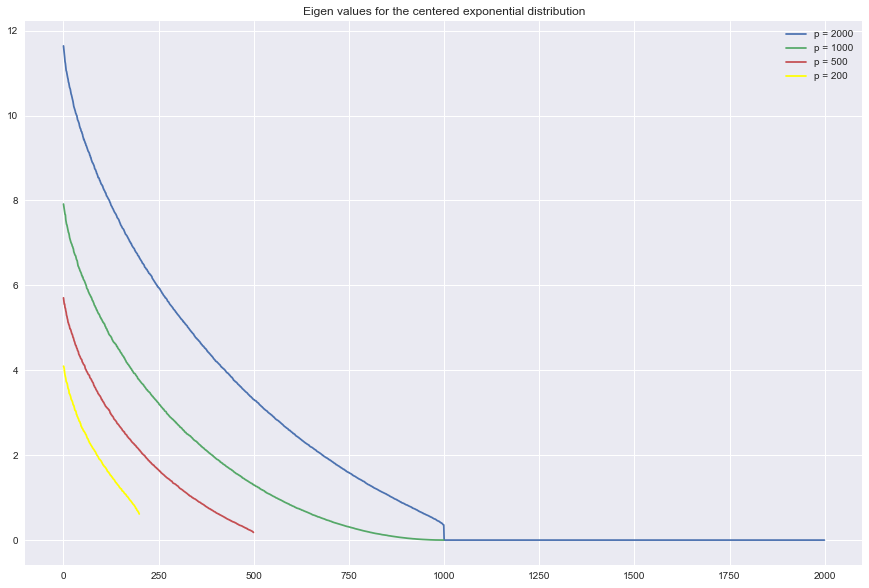

In [12]:
# We compute the sorted spectrum of the matrices
C1 = np.flip(sorted(np.linalg.eigvals(O1)),0)
C2 = np.flip(sorted(np.linalg.eigvals(O2)),0)
C3 = np.flip(sorted(np.linalg.eigvals(O3)),0)
C4 = np.flip(sorted(np.linalg.eigvals(O4)),0)

plt.clf()
plt.plot(C4, label='p = 2000')
plt.plot(C3, label='p = 1000')
plt.plot(C2, label='p = 500')
plt.plot(C1, 'yellow', label='p = 200')
plt.title("Eigen values for the centered exponential distribution")
plt.legend()
plt.show()

NB : As we get complex eigen values the imaginary part is not shown on the graph

Remark : It is always the same result, whatever the distribution we compute.


## Exercice 3

6)

In [13]:
def power_method(X,u,v,n_iter):
    for _ in range (n_iter):
        u,v = np.dot(X,v),np.dot(np.transpose(X),u)
        v,u = (1/np.linalg.norm(v))*v, (1/np.linalg.norm(u))*u
    return u,v
    

7) To display the convergence, we compute the norm 2 of the difference of the singular vectors and respectively u and v.

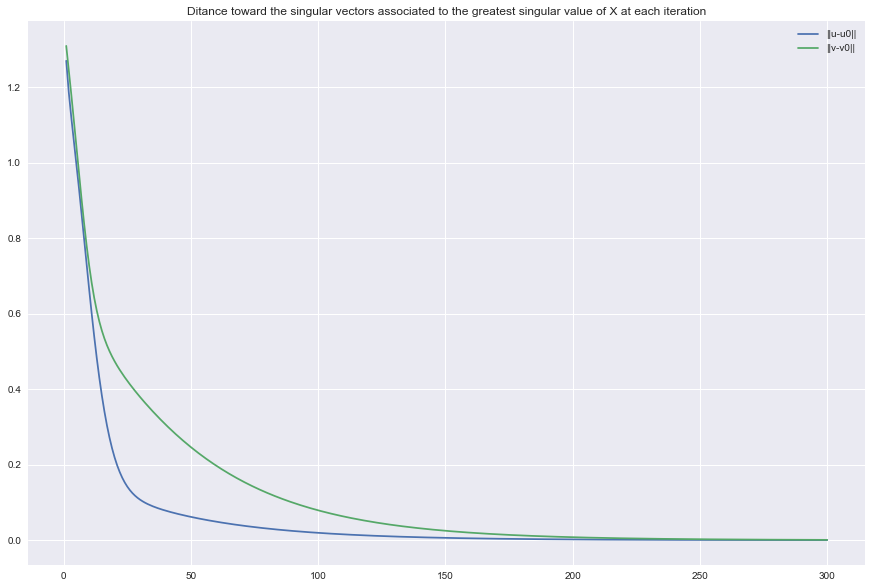

In [14]:
n = 1000
p = 1000
u, valSin, v = np.linalg.svd(X3,full_matrices=0)

u0, v0 = u[:,0].reshape(n), v[0,:].reshape(p)
u_iter, v_iter, n_iter = np.ones(n)/n, np.ones(p)/p, 300
norm_u, norm_v = [], []

def norm_inverse(vect1, vect2):
    if(np.inner(vect1,vect2) < 0):
        return np.linalg.norm(-vect1-vect2)
    else:
        return np.linalg.norm(vect1-vect2)
    
for i in range(0, n_iter):
    u_iter, v_iter = power_method(X3, u_iter, v_iter, 10)
    u_iter, v_iter = u_iter.reshape(n), v_iter.reshape(p)
    norm1 = norm_inverse(u_iter, u0)
    norm_u.append(norm1)
    norm1 = norm_inverse(v_iter, v0)
    norm_v.append(norm1)

plt.clf()
plt.plot(np.linspace(1,len(norm_u),len(norm_u)),norm_u, label='||u-u0||')
plt.plot(np.linspace(1,len(norm_v),len(norm_v)),norm_v, label='||v-v0||')
plt.title("Ditance toward the singular vectors associated to the greatest singular value of X at each iteration")
plt.legend()
plt.show()


Which shows the convergence toward the singular vectors associated to the greatest singular value of $X$.

8) As each initial conditions (u,v) has the same limit, I couldn't find any u,v with a different limit from the others.

9) To find out S the greatest eigen value of X, we compute u and v from the power method, and then we get $S = u.X.v^{T}$. 

10) To compute the vector associated to the second largest eigen value of X we compute the largest  one with the power_method on $X$ and then we compute again using the power_method algorithm with $X-S.u^{T}.v$ instead of $X$, where $S$ is the greatest eigen value ( $S = u.X.v^{T}$ ).

In [15]:
n_iter = 1000
X = X3

u1, v1  = power_method(X, u, v, n_iter)
s = np.dot(u1,np.dot(X,np.transpose(v1)))

X2 = X -s*np.dot(np.transpose(u),v)
u2, v2 = power_method(X, u1, v1, n_iter)
s2 = np.dot(u2,np.dot(X,np.transpose(v2)))

print("The largest eigen value of X is", s)
print("The second largest eigen value of X is", s2)

print(" \n \n We should have found a scalar each time and not a matrix, I must have made a mistake but I can't find it.")

The largest eigen value of X is [[  1.50219149e-03   4.04837936e-05  -3.06215141e-04 ...,  -6.24034553e-04
    1.36090435e-03  -4.79352376e-05]
 [  2.03433810e-03   5.73424079e-05  -4.25876093e-04 ...,  -8.08441128e-04
    1.79141856e-03  -7.05708520e-05]
 [  9.26076741e-04   2.97293695e-05  -2.09978736e-04 ...,  -3.15224652e-04
    7.41199707e-04  -4.02700524e-05]
 ..., 
 [ -8.30670727e-04  -2.48864775e-05   1.80436876e-04 ...,   3.08670339e-04
   -7.01315594e-04   3.21226996e-05]
 [  6.92722239e-04   2.05620913e-05  -1.49620979e-04 ...,  -2.60198567e-04
    5.88773271e-04  -2.63579154e-05]
 [ -1.06724274e-03  -2.55552314e-05   2.03304326e-04 ...,   4.90044202e-04
   -1.03257256e-03   2.68526079e-05]]
The second largest eigen value of X is [[  1.50309056e-03   4.55892457e-05  -3.28974318e-04 ...,  -5.50423007e-04
    1.25760699e-03  -5.93768125e-05]
 [  2.23223265e-03   6.77293733e-05  -4.88669285e-04 ...,  -8.17066546e-04
    1.86715389e-03  -8.82363832e-05]
 [  1.29943992e-03   3.94

## Exercice 4

11)

In [16]:
filename = u"http://josephsalmon.eu/enseignement/TELECOM/SD204/defra_consumption.csv"

na_values = []
df = pd.read_csv(filename, sep=';',
               na_values=na_values, index_col = 0)

12)

In [17]:
X = preprocessing.scale(df)

13)

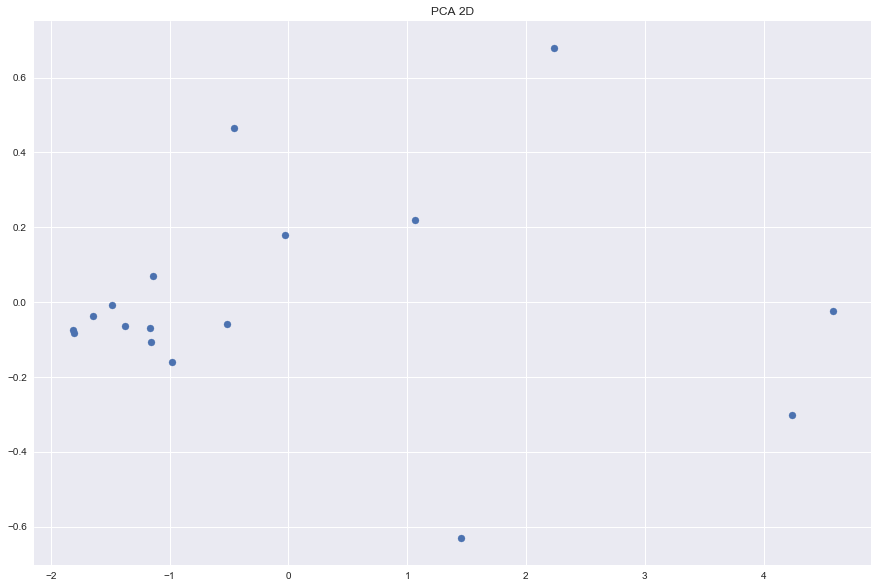

In [18]:
times = {}
results = {}

t = time.time()
pca2D = PCA(n_components=2)
X_pca_2D = pca2D.fit_transform(X)
t = time.time() - t
times["pca2D"] = t
results["pca2D"] = X_pca_2D

plt.title("PCA 2D")
plt.scatter(X_pca_2D[:,0], X_pca_2D[:,1])
plt.show()

14)

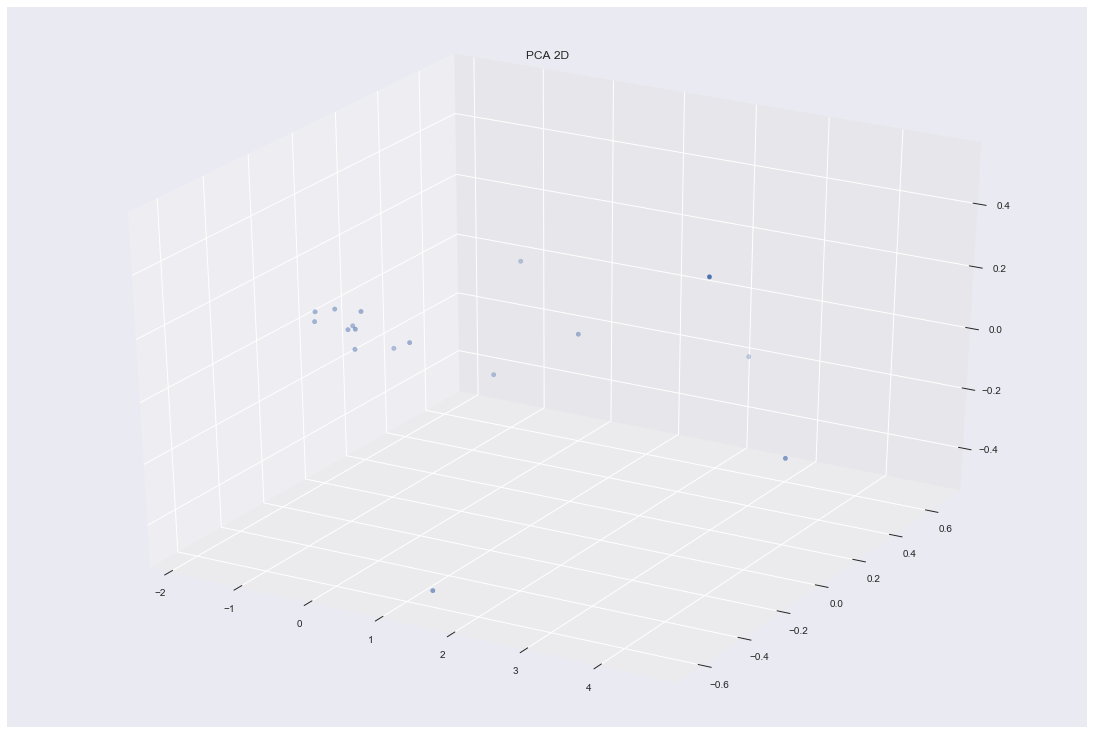

In [19]:
t = time.time()
pca3D = PCA(n_components=3)
X_pca_3D = pca3D.fit_transform(X)
t = time.time() - t
times["pca3D"] = t
results["pca3D"] = X_pca_3D

fig = plt.figure()
ax = Axes3D(fig)
plt.title("PCA 2D")
ax.scatter(X_pca_3D[:,0], X_pca_3D[:,1], X_pca_3D[:,2])
plt.show()

15) a) First we diagonalize $X^{T}X$.

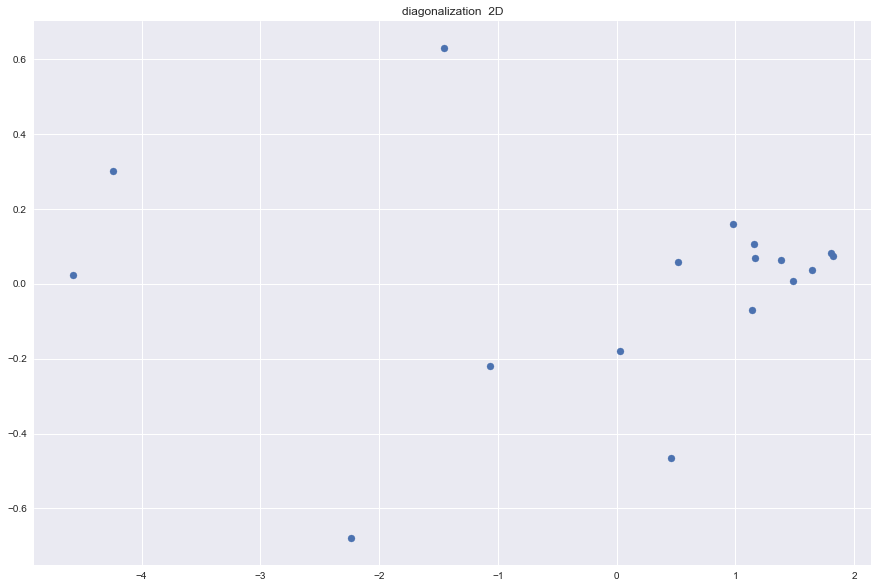

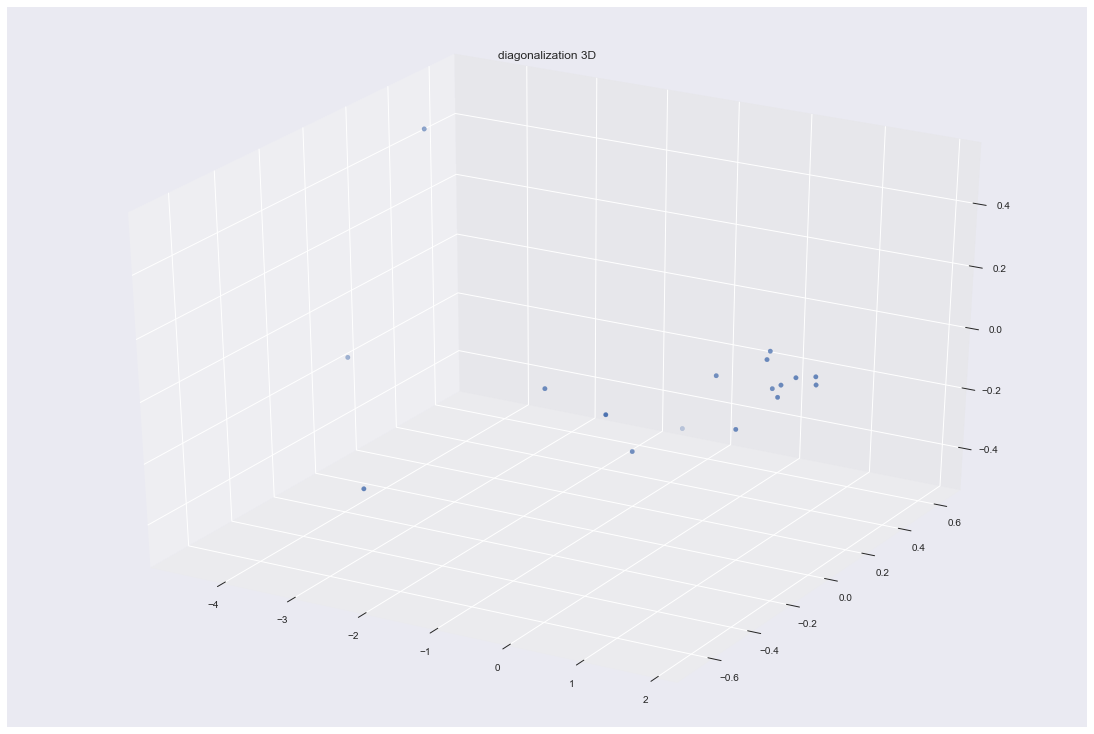

In [20]:
# We compute 2D and 3D
t = time.time()
D = np.linalg.eigh(X.T.dot(X))[1] 
diag_2D = X.dot(D[:, -1:-3:-1])
t = time.time() - t
times["diag2D"] = t
results["diag2D"] = diag_2D
diag_3D = X.dot(D[:, -1:-4:-1])
times["diag3D"] = t
results["diag3D"] = diag_3D

# We plot 2D and 3D
plt.title("diagonalization  2D")
plt.scatter(diag_2D[:,0], diag_2D[:,1])
plt.show()
fig = plt.figure()
ax = Axes3D(fig)
plt.title("diagonalization 3D")
ax.scatter(diag_3D[:,0], diag_3D[:,1], diag_3D[:,2])
plt.show()

b) SVD

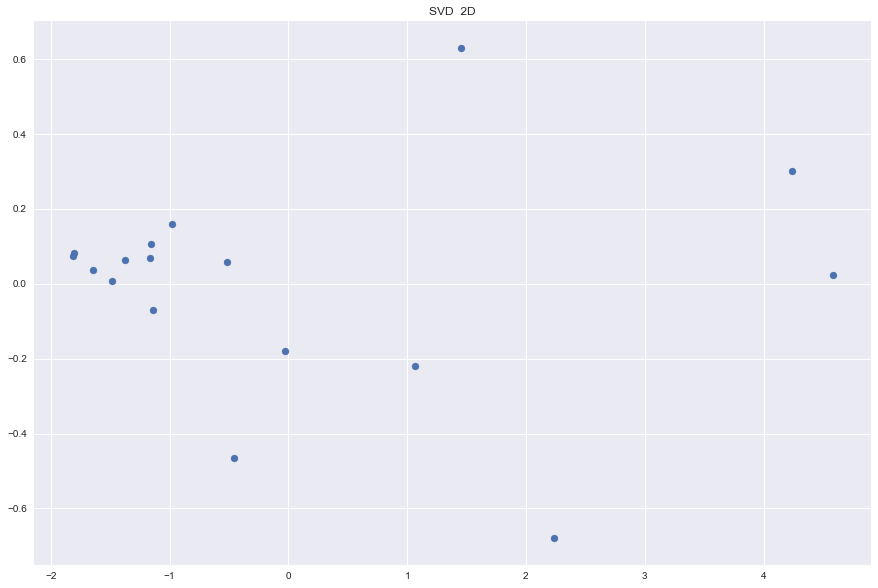

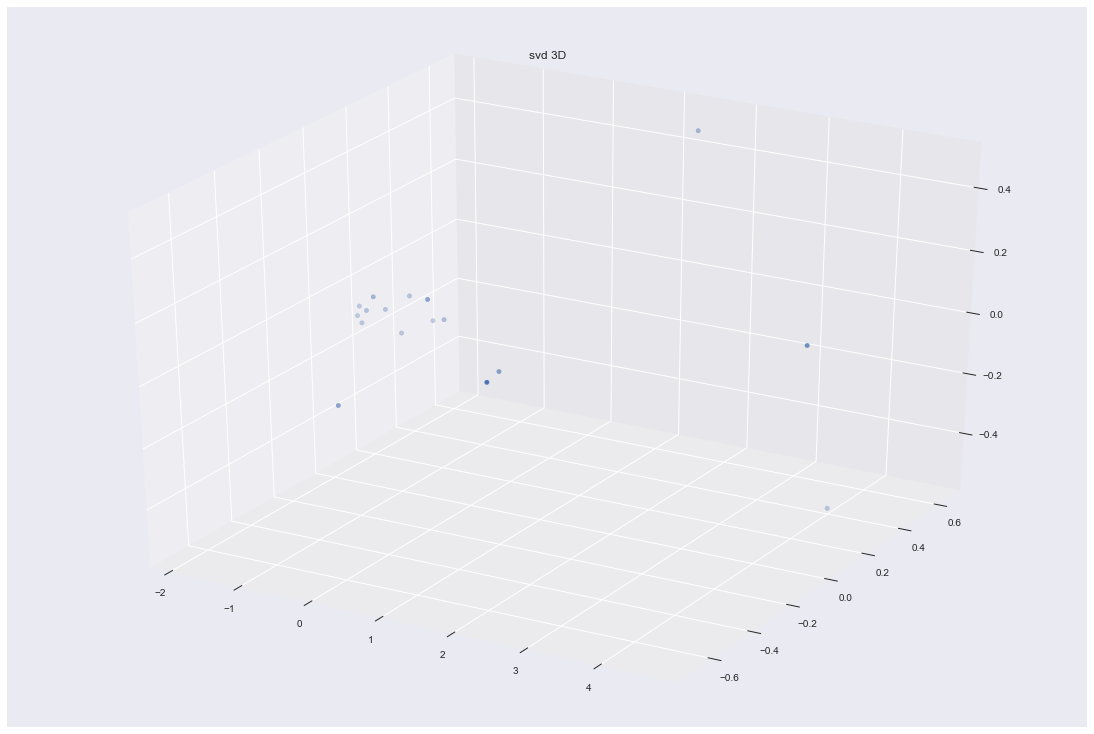

In [21]:
# We compute 2D and 3D
t = time.time()
u, s, v = np.linalg.svd(X)
svd_2D = X.dot(v[:2,:].T)
t = time.time() - t
times["svd2D"] = t
results["svd2D"] = svd_2D
svd_3D = X.dot(v[:3,:].T)
times["svd3D"] = t
results["svd3D"] = svd_3D

# We plot 2D and 3D
plt.title("SVD  2D")
plt.scatter(svd_2D[:,0], svd_2D[:,1])
plt.show()
fig = plt.figure()
ax = Axes3D(fig)
plt.title("svd 3D")
ax.scatter(svd_3D[:,0], svd_3D[:,1], svd_3D[:,2])
plt.show()

c) 

In [22]:
print("pca 2D  takes ", times["pca2D"], "s")
print("pca 3D  takes ", times["pca3D"], "s")
print("diag 2D takes ", times["diag2D"], "s")
print("diag 3D takes ", times["diag3D"], "s")
print("svd 2D  takes ", times["svd2D"], "s")
print("svd 3D  takes ", times["svd3D"], "s")

pca 2D  takes  0.0008437633514404297 s
pca 3D  takes  0.0005469322204589844 s
diag 2D takes  0.0004868507385253906 s
diag 3D takes  0.0004868507385253906 s
svd 2D  takes  0.0014410018920898438 s
svd 3D  takes  0.0014410018920898438 s


As we can see the svd is much quicker for such dataset, even though the timing is really acceptable for all solutions.

### Exercice 5

In [23]:
from sklearn.datasets import fetch_lfw_people
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape ##The number of face images
X = lfw_people.data
n_features = X.shape[1] ##The number of avelled face images of original size 62 x 47 pixels
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0] ##The number of the names of the people corresponding to the images
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


16) Tthe dataset is made of several images made of 1850 pixels each so the pixels are the features.

17) ...